**Goal**: To analyse sales data to study the most sold, most profitable and least sold fashion items as well as analyse their future trends

In [ ]:
pip install pandas

Code to get the 10 most sold, 5 most profitable and 10 least sold items from the input csv file

In [ ]:
import pandas as pd

# Load the data from CSV
df = pd.read_csv('/content/Fashion_Retail_Sales.csv')

# Count the number of each item sold
item_counts = df['Item Purchased'].value_counts()

# Get the 10 most sold items
most_sold_items = item_counts.head(10)

# Get the 10 least sold items
least_sold_items = item_counts.tail(10)

# Calculate the total purchase amount for each item
item_profit = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Get the 5 most profitable items
most_profitable_items = item_profit.sort_values(ascending=False).head(5)

# Display the results
print("10 Most Sold Items:")
print(most_sold_items)

print("\n10 Least Sold Items:")
print(least_sold_items)

print("\n5 Most Profitable Items:")
print(most_profitable_items)


10 Most Sold Items:
Item Purchased
Belt        90
Skirt       88
Shorts      87
Pants       86
Tank Top    82
T-shirt     82
Pajamas     81
Camisole    76
Loafers     76
Hoodie      75
Name: count, dtype: int64

10 Least Sold Items:
Item Purchased
Jeans         58
Slippers      58
Trousers      58
Jumpsuit      57
Dress         57
Tie           57
Sandals       54
Bowtie        52
Flip-Flops    51
Sun Hat       50
Name: count, dtype: int64

5 Most Profitable Items:
Item Purchased
Tunic      17275.0
Jeans      13068.0
Pajamas    12798.0
Shorts     12702.0
Handbag    12668.0
Name: Purchase Amount (USD), dtype: float64


In [ ]:
pip install pandas matplotlib

In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd

# Load the data from CSV
df = pd.read_csv('/content/Fashion_Retail_Sales.csv')

# Convert the 'Date Purchase' column to datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Group by 'Item Purchased' and sum the 'Purchase Amount (USD)'
profit_per_item = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Sort the items based on the total purchase amount in descending order
most_profitable_items = profit_per_item.sort_values(ascending=False).head(10)

# Display the results
print(most_profitable_items)


Item Purchased
Tunic         17275.0
Jeans         13068.0
Pajamas       12798.0
Shorts        12702.0
Handbag       12668.0
Gloves        12330.0
Boots         11891.0
Poncho        11422.0
Flip-Flops    11309.0
Slippers      11284.0
Name: Purchase Amount (USD), dtype: float64


Forecasted sales using prophet using the data of 2022 as training data and 2023 as test data

In [ ]:
pip install prophet


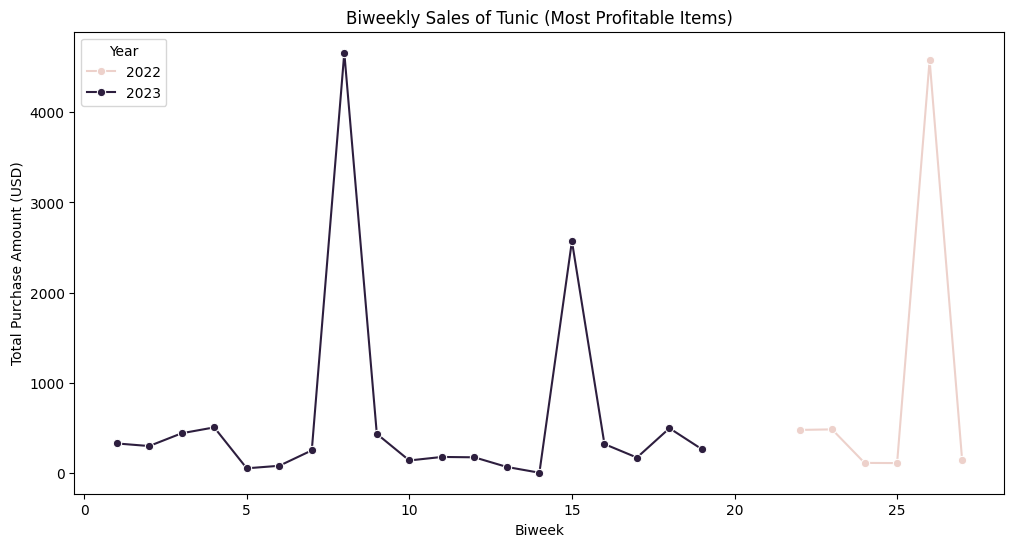

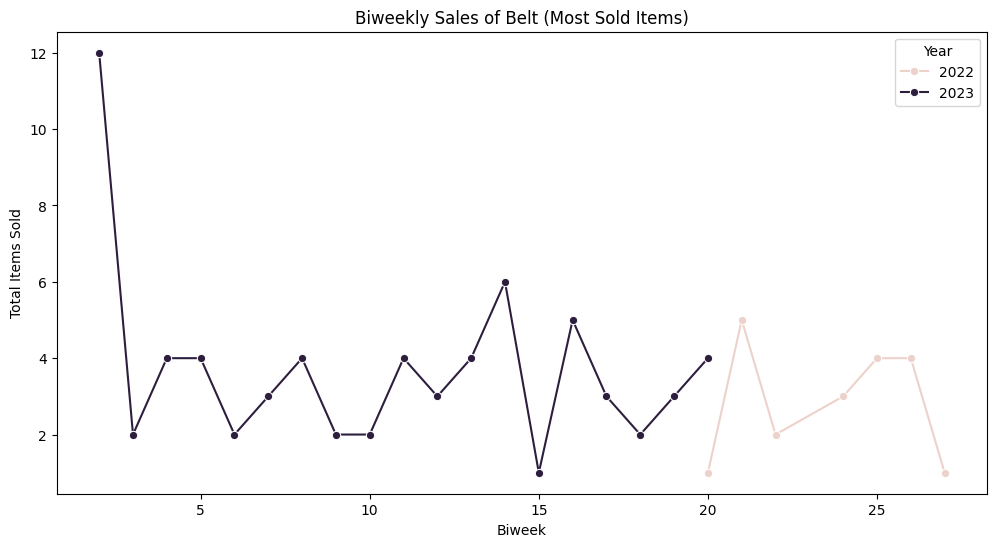

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nlfn19o/89061dsx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nlfn19o/ga5gq1qx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51777', 'data', 'file=/tmp/tmp4nlfn19o/89061dsx.json', 'init=/tmp/tmp4nlfn19o/ga5gq1qx.json', 'output', 'file=/tmp/tmp4nlfn19o/prophet_model3ir7cq05/prophet_model-20240714215137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


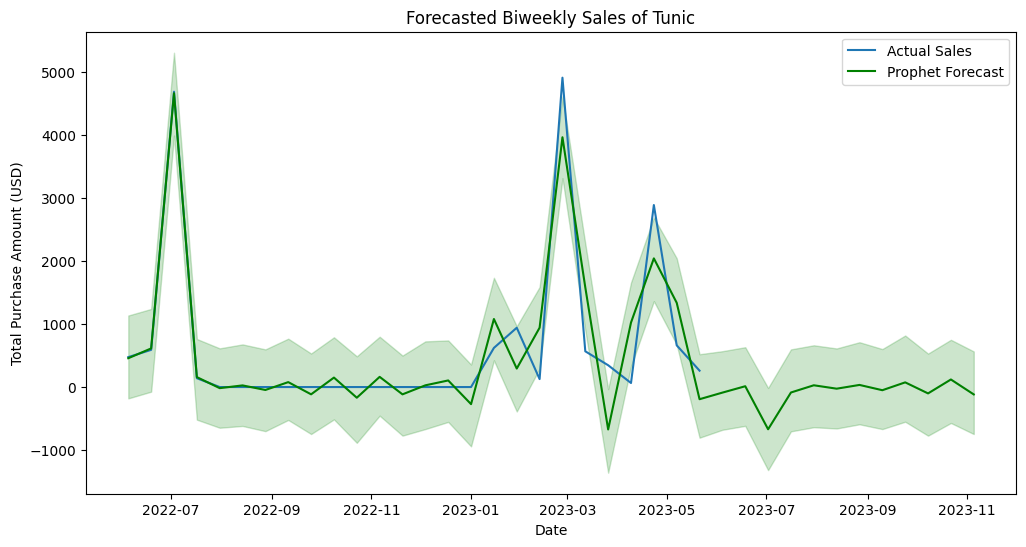

Prophet - MSE: 602459.4303850139, MAE: 736.8633157709263, RMSE: 776.18260118674


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data from CSV
df = pd.read_csv('/content/Fashion_Retail_Sales.csv')

# Convert the 'Date Purchase' column to datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Extract the biweek and year
df['Year'] = df['Date Purchase'].dt.year
df['Biweek'] = (df['Date Purchase'].dt.isocalendar().week // 2) + 1

# Add a count column to track the number of items sold
df['Count'] = 1

# Group by 'Year', 'Biweek', and 'Item Purchased' and aggregate the sums
biweekly_sales = df.groupby(['Year', 'Biweek', 'Item Purchased']).agg({'Count': 'sum', 'Purchase Amount (USD)': 'sum'}).reset_index()

# Identify the 10 most profitable items
most_profitable_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter biweekly sales for the most profitable items
biweekly_sales_profitable = biweekly_sales[biweekly_sales['Item Purchased'].isin(most_profitable_items)]

# Identify the 10 most sold items
most_sold_items = df.groupby('Item Purchased')['Count'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter biweekly sales for the most sold items
biweekly_sales_sold = biweekly_sales[biweekly_sales['Item Purchased'].isin(most_sold_items)]

# Function to plot biweekly sales graph for a specified item (most profitable items)
def plot_biweekly_sales_profitable(item):
    item_sales = biweekly_sales_profitable[biweekly_sales_profitable['Item Purchased'] == item]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=item_sales, x='Biweek', y='Purchase Amount (USD)', hue='Year', marker='o')
    plt.title(f'Biweekly Sales of {item} (Most Profitable Items)')
    plt.xlabel('Biweek')
    plt.ylabel('Total Purchase Amount (USD)')
    plt.legend(title='Year')
    plt.show()

# Function to plot biweekly sales graph for a specified item (most sold items)
def plot_biweekly_sales_sold(item):
    item_sales = biweekly_sales_sold[biweekly_sales_sold['Item Purchased'] == item]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=item_sales, x='Biweek', y='Count', hue='Year', marker='o')
    plt.title(f'Biweekly Sales of {item} (Most Sold Items)')
    plt.xlabel('Biweek')
    plt.ylabel('Total Items Sold')
    plt.legend(title='Year')
    plt.show()

# Function to forecast future sales for a specified item using Prophet
def forecast_sales(item, periods=12):
    item_sales = biweekly_sales_profitable[biweekly_sales_profitable['Item Purchased'] == item].copy()
    item_sales['Date'] = pd.to_datetime(item_sales['Year'].astype(str) + '-W' + item_sales['Biweek'].astype(str).str.zfill(2) + '-1', errors='coerce', format='%Y-W%W-%w')
    item_sales.set_index('Date', inplace=True)
    item_sales = item_sales.resample('2W').sum().reset_index()

    # Prepare data for Prophet
    prophet_data = item_sales[['Date', 'Purchase Amount (USD)']].rename(columns={'Date': 'ds', 'Purchase Amount (USD)': 'y'})

    # Fit the Prophet model with hyperparameters
    model_prophet = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.5,
        seasonality_prior_scale=10.0,
        seasonality_mode='multiplicative'
    )
    model_prophet.add_seasonality(name='biweekly', period=14, fourier_order=5)
    model_prophet.fit(prophet_data)

    # Create future dataframe
    future = model_prophet.make_future_dataframe(periods=periods, freq='2W')

    # Forecast the future sales using Prophet
    forecast_prophet = model_prophet.predict(future)

    # Plot the actual sales and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Sales')
    plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast', color='green')
    plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='green', alpha=0.2)
    plt.title(f'Forecasted Biweekly Sales of {item}')
    plt.xlabel('Date')
    plt.ylabel('Total Purchase Amount (USD)')
    plt.legend()
    plt.show()

    # Calculate and print evaluation metrics
    test_data = prophet_data[prophet_data['ds'] >= '2023-01-01']
    test_forecast = forecast_prophet[forecast_prophet['ds'].isin(test_data['ds'])]
    mse_prophet = mean_squared_error(test_data['y'], test_forecast['yhat'])
    mae_prophet = mean_absolute_error(test_data['y'], test_forecast['yhat'])
    rmse_prophet = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
    print(f'Prophet - MSE: {mse_prophet}, MAE: {mae_prophet}, RMSE: {rmse_prophet}')

# Example usage
# Replace 'Tunic' with any item from the most profitable items or most sold items
plot_biweekly_sales_profitable('Tunic')
plot_biweekly_sales_sold('Belt')
forecast_sales('Tunic')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data from CSV
df = pd.read_csv('/content/Fashion_Retail_Sales.csv')

# Convert the 'Date Purchase' column to datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Extract the biweek and year
df['Year'] = df['Date Purchase'].dt.year
df['Biweek'] = (df['Date Purchase'].dt.isocalendar().week // 2) + 1

# Add a count column to track the number of items sold
df['Count'] = 1

# Group by 'Year', 'Biweek', and 'Item Purchased' and aggregate the sums
biweekly_sales = df.groupby(['Year', 'Biweek', 'Item Purchased']).agg({'Count': 'sum', 'Purchase Amount (USD)': 'sum'}).reset_index()

# Identify the 10 most profitable items
most_profitable_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter biweekly sales for the most profitable items
biweekly_sales_profitable = biweekly_sales[biweekly_sales['Item Purchased'].isin(most_profitable_items)]

# Function to forecast future sales for a specified item using Prophet
def forecast_sales(item, periods=12):
    item_sales = biweekly_sales_profitable[biweekly_sales_profitable['Item Purchased'] == item].copy()
    item_sales['Date'] = pd.to_datetime(item_sales['Year'].astype(str) + '-W' + item_sales['Biweek'].astype(str).str.zfill(2) + '-1', errors='coerce', format='%Y-W%W-%w')
    item_sales.set_index('Date', inplace=True)
    item_sales = item_sales.resample('2W').sum().reset_index()

    # Prepare data for Prophet
    prophet_data = item_sales[['Date', 'Purchase Amount (USD)']].rename(columns={'Date': 'ds', 'Purchase Amount (USD)': 'y'})

    # Fit the Prophet model with hyperparameters
    model_prophet = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.5,
        seasonality_prior_scale=10.0,
        seasonality_mode='multiplicative'
    )
    model_prophet.add_seasonality(name='biweekly', period=14, fourier_order=5)
    model_prophet.fit(prophet_data)

    # Create future dataframe
    future = model_prophet.make_future_dataframe(periods=periods, freq='2W')

    # Forecast the future sales using Prophet
    forecast_prophet = model_prophet.predict(future)

    # Plot the actual sales and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Sales')
    plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast', color='green')
    plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='green', alpha=0.2)
    plt.title(f'Forecasted Biweekly Sales of {item}')
    plt.xlabel('Date')
    plt.ylabel('Total Purchase Amount (USD)')
    plt.legend()
    plt.show()

    # Calculate and print evaluation metrics
    test_data = prophet_data[prophet_data['ds'] >= '2023-01-01']
    test_forecast = forecast_prophet[forecast_prophet['ds'].isin(test_data['ds'])]
    mse_prophet = mean_squared_error(test_data['y'], test_forecast['yhat'])
    mae_prophet = mean_absolute_error(test_data['y'], test_forecast['yhat'])
    rmse_prophet = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
    print(f'Prophet - MSE: {mse_prophet}, MAE: {mae_prophet}, RMSE: {rmse_prophet}')

# Example usage
# Replace 'Tunic' with any item from the most profitable items
forecast_sales('Shorts')


FileNotFoundError: [Errno 2] No such file or directory: '/content/Fashion_Retail_Sales.csv'